In [57]:
# !wget https://download.pytorch.org/tutorial/data.zip
# !unzip data.zip

import os
import numpy as np
import unicodedata

def le_arquivo(path):
    nomes = open(path).read().split('\n')
    nomes = [unicodedata.normalize('NFKD', nome).encode('ascii', 'ignore') for nome in nomes]
    categoria = path.split('/')[-1].split('.')[0]
    categorias = np.repeat(categoria, len(nomes))
    
    return nomes, categorias
root = './data/names/'
arquivos = sorted(os.listdir(root))

dados, rotulos = [], []
for arquivo in arquivos:
    nomes, nacionalidades = le_arquivo(os.path.join(root, arquivo))
    
    dados.append(nomes)
    rotulos.append(nacionalidades)
    
len(dados), len(rotulos)



(18, 18)

In [73]:
import torch

categorias = [arquivo.split('.')[0] for arquivo in arquivos]

def label2tensor(str):
    posicao = categorias.index(str)
    return torch.LongTensor([posicao])

rotulos[8][10], label2tensor(rotulos[8][10])



(np.str_('Irish'), tensor([8]))

In [74]:
import string

dicionario = string.ascii_letters + " '-"

def name2tensor(name):
    name = name.decode('utf-8')

    name_tns = torch.zeros(len(name), len(dicionario))

    for k, letra in enumerate(name):
        if letra in dicionario:
            name_tns[k][dicionario.index(letra)] = 1

    return name_tns
print(name2tensor(dados[0][10]))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [75]:
def amostrar(num_amostras):
    dados_amostra, rotulos_amostra = [], []
    
    for cat in categorias:
        num_nomes = len(dados[categorias.index(cat)])
        
        indices = np.random.choice(range(num_nomes), size=num_amostras)
        dados_amostra.extend([dado for idx, dado in enumerate(dados[categorias.index(cat)]) if idx in indices ])
        rotulos_amostra.extend([rotulo for idx, rotulo in enumerate(rotulos[categorias.index(cat)]) if idx in indices ])
        
    dados_amostra   = [name2tensor(nome) for nome in dados_amostra]
    rotulos_amostra   = [label2tensor(rotulo) for rotulo in rotulos_amostra]
    
    return dados_amostra, rotulos_amostra

num_amostras = 50
dados_tns, rotulos_tns = amostrar(num_amostras)

print(len(dados_tns), len(rotulos_tns))
print(dados_tns[10], rotulos_tns[10])

811 811
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [79]:
from torch import nn

class RNN(nn.Module):
    def __init__(self, tam_entrada, tam_hidden, tam_saida):
        super(RNN, self).__init__()
        self.tam_hidden = tam_hidden
        
        self.recurrent = nn.RNNCell(tam_entrada, tam_hidden)
        self.saida     = nn.Linear(tam_hidden, tam_saida)
        self.ativacao  = nn.LogSoftmax()
        
    def forward(self, nome):
        
        h = torch.zeros(1, self.tam_hidden)
        
        for letra in nome:
            h = self.recurrent(letra.unsqueeze(0), h)
        saida = self.ativacao(self.saida(h))
        return saida
    
modelo = RNN(len(dicionario), 256, len(categorias))
print(modelo)

RNN(
  (recurrent): RNNCell(55, 256)
  (saida): Linear(in_features=256, out_features=18, bias=True)
  (ativacao): LogSoftmax(dim=None)
)


In [87]:
args = {'lr': 5e-5, 'weight_decay': 1e-7}

criterio = nn.NLLLoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

def foward(X, Y, etapa, epoca):
    loss_epoca = []
    acuracia = 0.
    for dado, rotulo in zip(X, Y):
        saida = modelo(dado)
        loss = criterio(saida, rotulo)
        loss_epoca.append(loss.item())
        
        _, pred = torch.max(saida, axis= -1)
        acuracia +=1 if pred[0].item() == rotulo[0].item() else 0

        if etapa == 'treino':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    loss_epoca = np.array(loss_epoca)
    acuracia   = acuracia/float(len(X))
    print('\n', '*'*15 + etapa + '*'*15)
    print('Epoca: {:}, Loss: {:.2f} +- {:.2f}, Acc: {:.2f}'.format(epoca, loss.mean(), loss.std(), acuracia*100))
    
    return float(loss.mean()), float(acuracia)

In [88]:
loss_treino, loss_teste = [], []
acc_treino, acc_teste = [], []

dados_test, rotulos_teste = amostrar(50)

for epoca in range(100):
    dados_tns, rotuloss_tns = amostrar(50)
    loss, acc = foward(dados_tns, rotulos_tns, 'treino', epoca)
    loss_treino.append(loss)
    acc_treino.append(acc)
    
    loss, acc = foward(dados_test, rotulos_teste, 'teste', epoca)
    loss_teste.append(loss)
    acc_teste.append(acc)

/home/afranio/Documents/python/redes-neurais-recorrentes/env/lib/python3.12/site-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)



 ***************treino***************
Epoca: 0, Loss: 0.25 +- nan, Acc: 51.66


/tmp/ipykernel_148918/741208807.py:25: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1857.)
  print('Epoca: {:}, Loss: {:.2f} +- {:.2f}, Acc: {:.2f}'.format(epoca, loss.mean(), loss.std(), acuracia*100))
/tmp/ipykernel_148918/741208807.py:27: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  return float(loss.mean()), float(acuracia)



 ***************teste***************
Epoca: 0, Loss: 2.68 +- nan, Acc: 55.39

 ***************treino***************
Epoca: 1, Loss: 1.42 +- nan, Acc: 51.04

 ***************teste***************
Epoca: 1, Loss: 2.67 +- nan, Acc: 54.65

 ***************treino***************
Epoca: 2, Loss: 0.43 +- nan, Acc: 52.95

 ***************teste***************
Epoca: 2, Loss: 2.67 +- nan, Acc: 55.76

 ***************treino***************
Epoca: 3, Loss: 0.54 +- nan, Acc: 47.56

 ***************teste***************
Epoca: 3, Loss: 2.67 +- nan, Acc: 54.15

 ***************treino***************
Epoca: 4, Loss: 2.67 +- nan, Acc: 53.03

 ***************teste***************
Epoca: 4, Loss: 2.67 +- nan, Acc: 54.52

 ***************treino***************
Epoca: 5, Loss: 1.33 +- nan, Acc: 51.72

 ***************teste***************
Epoca: 5, Loss: 2.67 +- nan, Acc: 54.03

 ***************treino***************
Epoca: 6, Loss: 0.40 +- nan, Acc: 54.79

 ***************teste***************
Epoca: 6, Loss: 2.67

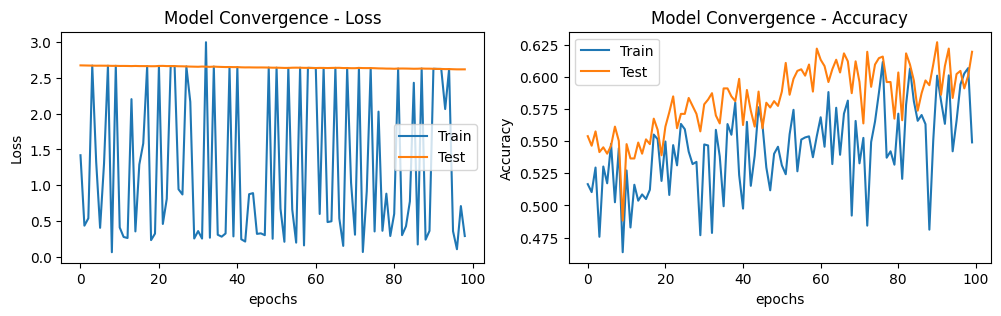

In [89]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))

ax1.plot(loss_treino[1:], label='Train')
ax1.plot(loss_teste[1:], label='Test')
ax1.set_title('Model Convergence - Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(acc_treino, label='Train')
ax2.plot(acc_teste, label='Test')
ax2.set_title('Model Convergence - Accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


In [90]:
def predict(nome):
    modelo.eval()
    
    tns = torch.zeros(len(nome), len(dicionario))
    for k, letra in enumerate(nome):
        idx = dicionario.find(letra)
        tns[k, idx] = 1
        
    saida = modelo(tns)
    topv, topi = saida.data.topk(3, 1, True)
    
    print(nome)
    for value, index in zip(topv[0], topi[0]):
        print('(%.2f) %s' % (value, categorias[index]))
    print('\n')
    
predict('Merkel')
predict('Hirobumi')
predict('Suarez')
    

Merkel
(-1.05) German
(-1.86) Scottish
(-2.02) English


Hirobumi
(-0.32) Japanese
(-1.52) Arabic
(-4.14) Greek


Suarez
(-0.39) Spanish
(-1.96) Portuguese
(-2.99) Polish




/home/afranio/Documents/python/redes-neurais-recorrentes/env/lib/python3.12/site-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
